<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:130%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>Movie Dataset Analysis</b></div>

![diabetes](https://i.postimg.cc/KYwKLQj4/preview-2.webp.jpg)

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#intro">1. Introduction</a>
- <a href="#libraries">2. Importing Required Libraries</a>
- <a href="#data">3. Checking if the dataset is available</a>
- <a href="#eda">4. Connectig to the database and showiing the tables</a>
- <a href="#prepr">5. Questions and Queries and vesualization for it </a>

    - <a href="#sep">5.1. What is the average number of votes for the top 25% most profitable movies?</a>
    - <a href="#sep">5.2. What is the Top 10 Production Companies by Total Net Profit?</a>
    - <a href="#split">5.3. Do longer movies tend to have higher net profits?</a>
    - <a href="#scale">5.4. Do movies with higher vote counts tend to be more profitable?</a>
    - <a href="#scale">5.5. Which actors are most strongly associated with a movie's profitability, and how does their presence in a film impact its net profit?</a>
    - <a href="#scale">5.6. What is the most produced type of movie in the dataset, and how does its production frequency compare to other types?</a>
    - <a href="#scale">5.7. Which genres generate  the most revenue, profit , budget?</a>
    - <a href="#scale">5.8. How do the number of votes and popularity of movies relate to their net profit for movies with more than 50 votes?</a>

    

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 1. Introduction </b></div>

## **Project Description**

This project explores a movie dataset that consists of three interconnected tables: **Movies**, **Financial**, and **Audience**. 

The goal is to gain insights into various aspects of movies, such as:

- **Duration**
- **Release date**
- **Production company**
- **Financial performance** (revenue, budget, net profit)
- **Audience reception** (votes, popularity)

By analyzing this dataset, we aim to uncover **patterns**, **correlations**, and **trends** that can help in understanding the success factors of movies.


### **Table Descriptions**

#### **1. Movies Table**  
Contains general details about movies.  

- **Id (Primary Key):** Unique identifier for each movie  
- **Name:** Title of the movie  
- **Duration:** Length of the movie (in minutes)  
- **ReleaseDate:** The release date of the movie  
- **Actors:** List of actors in the movie  
- **ProductionCompany:** Name of the production company  
- **Recency:** A measure of how recent the movie is  
- **genres:** Kind of the film 


#### **2. Financial Table**  
Contains financial performance data for each movie.  

- **Id (Foreign Key):** Links to the Movies table  
- **Revenue:** Total revenue generated by the movie  
- **Budget:** Total budget allocated to the movie  
- **NetProfit:** Calculated as `Revenue - Budget`  

#### **3. Audience Table**  
Contains audience reception and engagement metrics for each movie.  

- **Id (Foreign Key):** Links to the Movies table  
- **Votes:** Total votes received for the movie  
- **VoteCount:** Number of individual vote submissions  
- **Popularity:** A score indicating the movie's popularity  


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 2. Importing Required Libraries </b></div>

In [10]:
import os
from IPython.display import display, HTML
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 3. Checking if the dataset is available </b></div>

In [12]:
db_path = r"C:\Users\ehabh\Desktop\new_movies.db"
print(os.path.exists(db_path))  # Should print True if the file exists

True


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 4. Connectig to the database and showiing the tables</b></div>

In [14]:
# Path to the database
db_path = r"C:\Users\ehabh\Desktop\new_movies.db"

# Establish connection to the database
conn = sqlite3.connect(db_path)

# List of table names
tables = ['Movie', 'Financial', 'Audience']

# Fetch and display data for each table
print("\n")
for table in tables:
    display(HTML(f"<h2 style='color: #1f4e78;'>Showing data from {table} table:</h2>"))
    query = f"SELECT * FROM {table} LIMIT 10;"  # Adjust the number of rows as needed
    df = pd.read_sql(query, conn)
    display(df)  # In Jupyter Notebook, use display to show data in a more readable format
    print("\n")  # Adding a newline for better separation between tables




,id,Title,runtime,release_date,Actors,production_companies,recency,genres
0,5,Four Rooms,98.0,1995-12-09,Tim Roth-Jennifer Beals-Antonio Banderas-Valer...,Miramax-A Band Apart,19382,Crime-Comedy
1,6,Judgment Night,96.0,1993-10-15,Emilio Estevez-Cuba Gooding Jr.-Denis Leary-St...,JVC-Largo Entertainment,20167,Action-Crime-Thriller
2,11,Star Wars,121.0,1977-05-25,Mark Hamill-Harrison Ford-Carrie Fisher-Peter ...,Lucasfilm-20th Century Fox,26154,Adventure-Action-Science Fiction
3,12,Finding Nemo,100.0,2003-05-30,Albert Brooks-Ellen DeGeneres-Alexander Gould-...,Pixar,16653,Animation-Family
4,13,Forrest Gump,142.0,1994-06-23,Tom Hanks-Robin Wright-Gary Sinise-Sally Field...,Paramount-The Steve Tisch Company-Wendy Finerm...,19916,Comedy-Drama-Romance
5,14,American Beauty,69.0,1999-09-15,Kevin Spacey-Annette Bening-Thora Birch-Wes Be...,Jinks/Cohen Company-DreamWorks Pictures,18006,Drama
6,15,Citizen Kane,119.0,1941-04-17,Orson Welles-Joseph Cotten-Dorothy Comingore-R...,Mercury Productions-RKO Radio Pictures,39341,Mystery-Drama
7,16,Dancer in the Dark,141.0,2000-06-30,Björk-Catherine Deneuve-David Morse-Peter Stor...,Fine Line Features-WDR-Constantin Film-Zentrop...,17717,Drama-Crime
8,18,The Fifth Element,126.0,1997-05-02,Bruce Willis-Milla Jovovich-Gary Oldman-Ian Ho...,Gaumont-Buena Vista International-Columbia Pic...,18872,Adventure-Fantasy-Action-Thriller-Science Fiction
9,20,My Life Without Me,106.0,2003-03-07,Sarah Polley-Amanda Plummer-Scott Speedman-Mar...,El Deseo-Milestone Productions,16737,Drama-Romance


,id,revenue,budget,netprofit
0,5,4257354.0,4000000.0,2.573540e+05
1,6,6068469.0,10500000.0,-4.431531e+06
2,11,775398007.0,11000000.0,7.643980e+08
3,12,940335536.0,94000000.0,8.463355e+08
4,13,677387716.0,55000000.0,6.223877e+08
5,14,118765533.66666667,5000000.0,1.137655e+08
6,15,23218000.0,839727.0,2.237827e+07
7,16,40031879.0,12800000.0,2.723188e+07
8,18,263920180.0,90000000.0,1.739202e+08
9,20,12300000.0,2500000.0,9.800000e+06


,id,votes,vote_count,popularity
0,5,5.7,2288.0,41.855
1,6,3.8,138.0,5.3125
2,11,8.2,18331.0,96.126
3,12,7.823,17612.0,73.866
4,13,8.48,24667.0,63.502
5,14,2.677,3613.6666666666665,9.770666666666667
6,15,8.022,4775.0,19.9
7,16,7.9,1513.0,17.53
8,18,7.5,9524.0,53.821
9,20,5.852,392.0,32.575


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 5. Questions and Queries and vesualization for it</b></div>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 5.1. What is the average number of votes for the top 25% most profitable movies?</b></div>

# **Relationship Between Profitability and Audience Votes**

This analysis investigates the relationship between **profitability** and **audience votes** by calculating the **average number of votes** received by movies in the **top 25% of net profit**. 


In [18]:
# SQL query to join Audience and Financial tables and select relevant columns
query_1 = """
select a.Votes, a.Popularity, f.NetProfit
from Audience a 
join Financial f on a.Id = f.Id;
"""

# Execute the query and store the result in a DataFrame
result_1 = pd.read_sql_query(query_1, conn)
display(result_1)

# Describe the dataset to get statistical summaries
description = result_1.describe()
display(description)

# Calculate the 75th percentile of the 'NetProfit' column
profit_75th = result_1['netprofit'].quantile(0.75)

# Filter the top 25% of movies based on NetProfit
top_25 = result_1[result_1['netprofit'] >= profit_75th]
display(top_25.head())

# Convert 'votes' column to numeric, coercing errors to NaN
top_25.loc[:, 'votes'] = pd.to_numeric(top_25['votes'], errors='coerce')

# Calculate the average number of votes for the top 25% of movies
avg_Votes_top_25 = top_25['votes'].mean()
print(avg_Votes_top_25)




,votes,popularity,netprofit
0,5.7,41.855,2.573540e+05
1,3.8,5.3125,-4.431531e+06
2,8.2,96.126,7.643980e+08
3,7.823,73.866,8.463355e+08
4,8.48,63.502,6.223877e+08
...,...,...,...
9277,1.7333333333333334,1.8236666666666668,-9.567989e+04
9278,9.0,0.666,2.750000e+03
9279,3.0,0.8062499999999999,-8.152500e+02
9280,3.85,9.344000000000001,3.565306e+06


,netprofit
count,9.282000e+03
mean,3.470107e+07
std,1.151217e+08
min,-1.947758e+08
25%,-6.407245e+05
50%,1.485000e+06
75%,2.128158e+07
max,2.443439e+09


,votes,popularity,netprofit
2,8.2,96.126,7.643980e+08
3,7.823,73.866,8.463355e+08
4,8.48,63.502,6.223877e+08
5,2.677,9.770666666666667,1.137655e+08
6,8.022,19.9,2.237827e+07


6.284805198574009


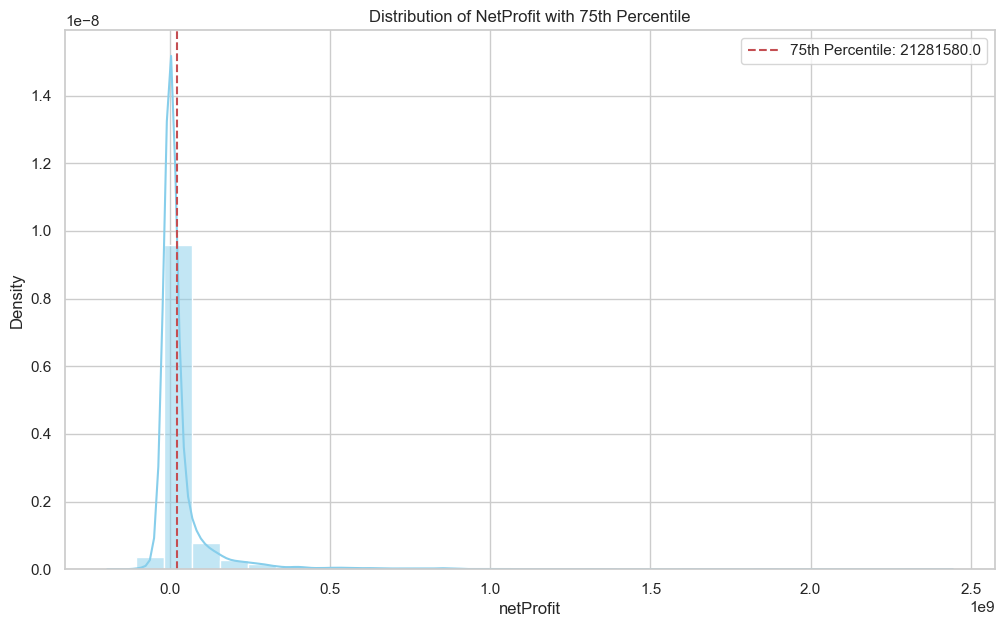

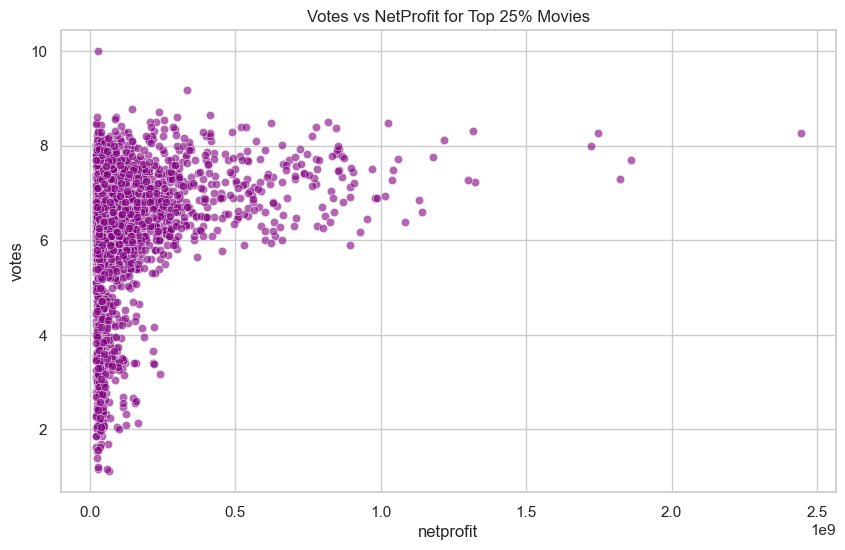

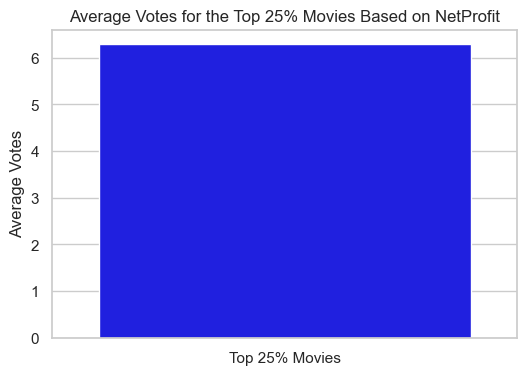

In [19]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Distribution of 'NetProfit' with the 75th percentile line
plt.figure(figsize=(12, 7))
sns.histplot(result_1['netprofit'], kde=True, bins=30, color='skyblue', stat='density')
plt.axvline(profit_75th, color='r', linestyle='--', label=f'75th Percentile: {profit_75th}')
plt.title('Distribution of NetProfit with 75th Percentile')
plt.xlabel('netProfit')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot 2: Scatter plot of Votes vs NetProfit for Top 25% movies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_25, x='netprofit', y='votes', color='purple', alpha=0.6)
plt.title('Votes vs NetProfit for Top 25% Movies')
plt.xlabel('netprofit')
plt.ylabel('votes')
plt.show()

# Plot 3: Average Votes for the Top 25% Movies
plt.figure(figsize=(6, 4))
sns.barplot(x=['Top 25% Movies'], y=[avg_Votes_top_25], color='blue')
plt.title('Average Votes for the Top 25% Movies Based on NetProfit')
plt.ylabel('Average Votes')
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 5.2. What is the Top 10 Production Companies by Total Net Profit?</b></div>

# **Grouping by Production Company**

#### Grouping by the **Production Company** allows us to analyze the profitability of each company rather than individual films. This means we can compare how profitable different production companies are based on the net profit of the films they produced. It aggregates the data by production company and calculates the total or average profitability for each company.

,production_companies,total_netprofit
0,Marvel Studios,1.517090e+10
1,DreamWorks Animation,5.088777e+09
2,Warner Bros. Pictures-Heyday Films,4.684138e+09
3,Pixar-Walt Disney Pictures,3.841730e+09
4,Walt Disney Pictures-Walt Disney Animation Stu...,3.600900e+09
5,Illumination-Universal Pictures,3.423963e+09
6,Universal Pictures-Amblin Entertainment,2.725727e+09
7,Lucasfilm,2.679016e+09
8,New Line Cinema-WingNut Films-The Saul Zaentz ...,2.650545e+09
9,Lucasfilm-Bad Robot,2.647368e+09


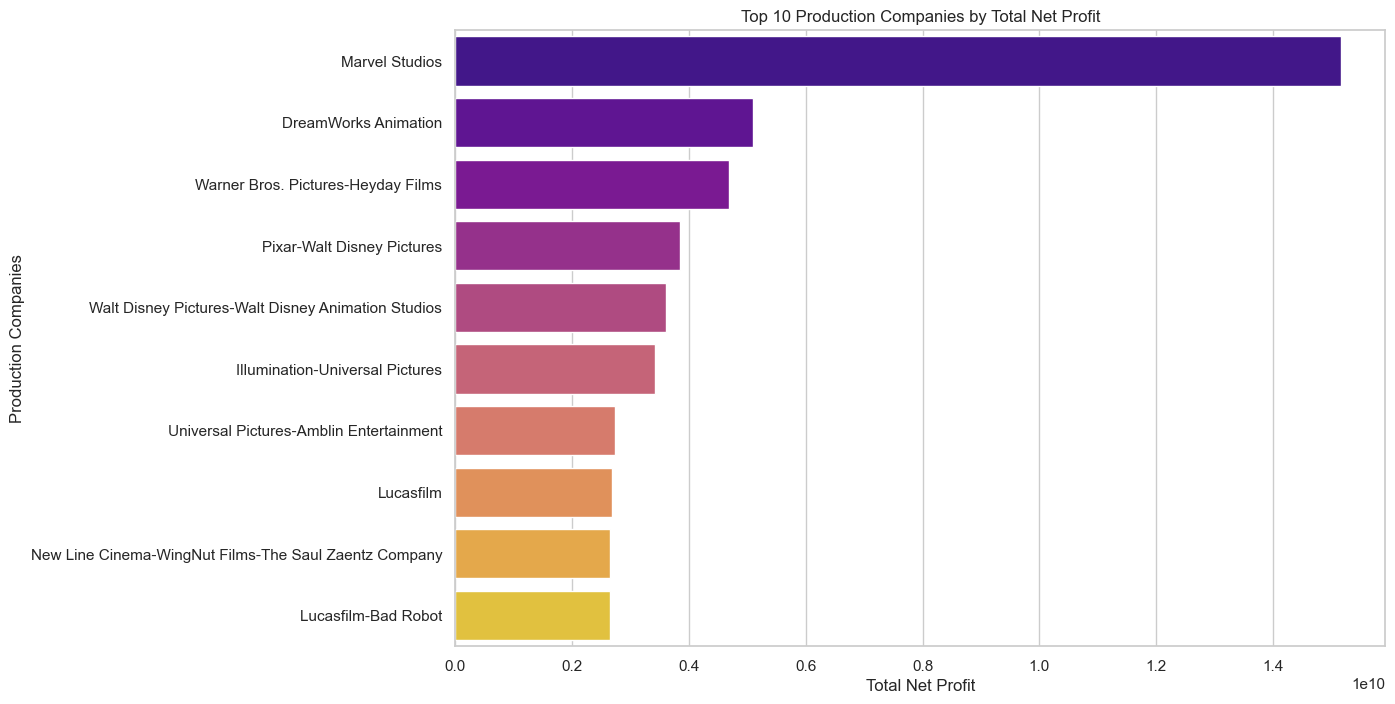

In [25]:
# SQL query to group by production companies and calculate total net profit
query_group_by_company = """
select m.production_companies, sum(f.netprofit) as total_netprofit
from Movie m 
join Financial f on m.Id = f.Id
join Audience a on m.Id = a.Id
group by m.production_companies
order by total_netprofit desc
limit 100;
"""

# Execute the query and store the result in a DataFrame
result_group_by_company = pd.read_sql_query(query_group_by_company, conn)
# Display the result
display(result_group_by_company.head(10))

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot a bar chart of total net profit by production company
sns.barplot(x='total_netprofit', y='production_companies', data=result_group_by_company.head(10), palette='plasma', hue='production_companies')

# Set the labels and title
plt.xlabel('Total Net Profit')
plt.ylabel('Production Companies')
plt.title('Top 10 Production Companies by Total Net Profit')

# Display the plot
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 5.3. Do longer movies tend to have higher net profits?</b></div>

# **Average Runtime of Top Profitable Movies**

#### we want to compare the **average runtime** of the top profitable movies to see if **longer movies** tend to be more profitable.


,Title,runtime,netprofit
0,Avengers: Endgame,181.0,2.443439e+09
1,Avatar: The Way of Water,192.0,1.860250e+09
2,Star Wars: The Force Awakens,136.0,1.823224e+09
3,Avengers: Infinity War,149.0,1.746240e+09
4,Spider-Man: No Way Home,148.0,1.721847e+09
5,Furious 7,137.0,1.325341e+09
6,Top Gun: Maverick,131.0,1.318733e+09
7,Frozen II,103.0,1.300027e+09
8,Harry Potter and the Deathly Hallows: Part 2,130.0,1.216511e+09
9,The Super Mario Bros. Movie,92.0,1.178767e+09


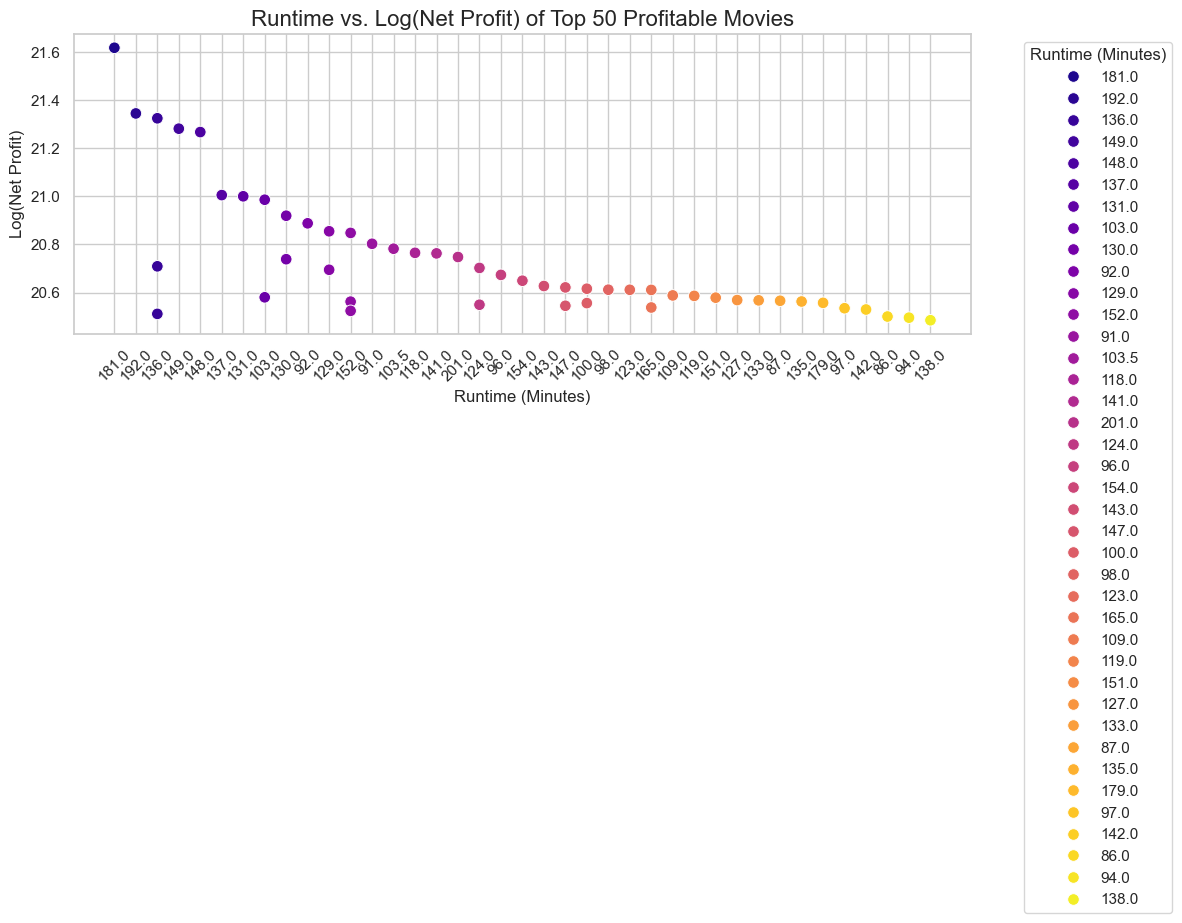

In [28]:
# Execute the query and fetch the top 50 profitable movies
query_8 = """
select m.Title, m.runtime, f.netprofit
from Movie m
join Financial f on m.Id = f.Id
order by f.netprofit desc
limit 50;
"""

result_8 = pd.read_sql_query(query_8, conn)
display(result_8.head(10))

result_8['log_netprofit'] = np.log1p(result_8['netprofit'])


plt.figure(figsize=(12, 7))
sns.scatterplot(data=result_8, x='runtime', y='log_netprofit', hue='runtime', palette='plasma', alpha=1, s=70)
plt.title("Runtime vs. Log(Net Profit) of Top 50 Profitable Movies", fontsize=16)
plt.xlabel("Runtime (Minutes)", fontsize=12)
plt.ylabel("Log(Net Profit)", fontsize=12)
plt.legend(title="Runtime (Minutes)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()



<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 5.4. Do movies with higher vote counts tend to be more profitable?</b></div>

# **Analyzing Movies with High Votes and Their Profitability**

#### This analysis will investigate whether **movies with higher votes** tend to be more profitable.


,Title,votes,netprofit
0,Avengers: Endgame,8.268,2.443439e+09
1,Avatar: The Way of Water,7.701,1.860250e+09
2,Star Wars: The Force Awakens,7.303,1.823224e+09
3,Avengers: Infinity War,8.263,1.746240e+09
4,Spider-Man: No Way Home,8.0,1.721847e+09
...,...,...,...
8713,Dead,2.1,-9.963233e+07
8714,Mars Needs Moms,6.0,-1.110072e+08
8715,Turning Red,7.49,-1.711201e+08
8716,The Tomorrow War,7.9,-1.856000e+08


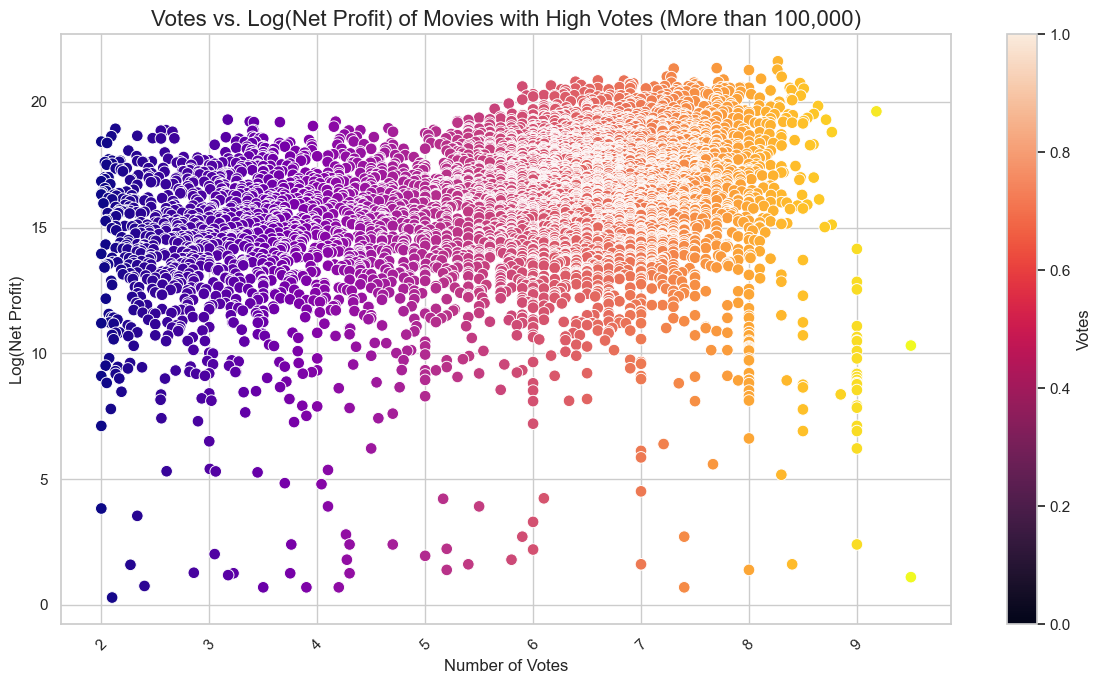

In [31]:
# SQL query
query_9 = """
select m.Title, a.votes, f.netprofit
from Movie m
join Financial f on m.Id = f.Id
join Audience a on m.Id = a.Id
where a.votes > 100
order by f.netprofit desc;
"""

# Execute query
result_9 = pd.read_sql_query(query_9, conn)
display(result_9)

# Filter out zero or negative netprofit values and compute log
result_9 = result_9[result_9['netprofit'] > 0]
result_9['log_netprofit'] = np.log1p(result_9['netprofit'])

# Ensure 'votes' column is numeric
result_9['votes'] = pd.to_numeric(result_9['votes'], errors='coerce')

# Set the range for the 'votes' hue
vmin, vmax = result_9['votes'].min(), result_9['votes'].max()

# Create scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=result_9, 
    x='votes', 
    y='log_netprofit', 
    hue='votes', 
    palette='plasma', 
    alpha=1, 
    s=70,
    legend=False,  # Turn off the legend
    hue_norm=(vmin, vmax)  # Normalize the hue values to the range of votes
)

# Add a colorbar with label
plt.colorbar(scatter.collections[0], label="Votes")

# Title and labels
plt.title("Votes vs. Log(Net Profit) of Movies with High Votes (More than 100,000)", fontsize=16)
plt.xlabel("Number of Votes", fontsize=12)
plt.ylabel("Log(Net Profit)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:60%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>5.5. Which actors are most strongly associated with a movie's profitability, and how does their presence in a film impact its net profit?</b></div>

# **Analyzing Actor Contribution to Movie Profitability**

#### To analyze whether certain actors contribute more to a movie's profitability, we can calculate how much **net profit** is associated with each actor, based on their appearance in the movies.


,Title,netprofit,Actors
0,Four Rooms,2.573540e+05,Tim Roth-Jennifer Beals-Antonio Banderas-Valer...
1,Judgment Night,-4.431531e+06,Emilio Estevez-Cuba Gooding Jr.-Denis Leary-St...
2,Star Wars,7.643980e+08,Mark Hamill-Harrison Ford-Carrie Fisher-Peter ...
3,Finding Nemo,8.463355e+08,Albert Brooks-Ellen DeGeneres-Alexander Gould-...
4,Forrest Gump,6.223877e+08,Tom Hanks-Robin Wright-Gary Sinise-Sally Field...
5,American Beauty,1.137655e+08,Kevin Spacey-Annette Bening-Thora Birch-Wes Be...
6,Citizen Kane,2.237827e+07,Orson Welles-Joseph Cotten-Dorothy Comingore-R...
7,Dancer in the Dark,2.723188e+07,Björk-Catherine Deneuve-David Morse-Peter Stor...
8,The Fifth Element,1.739202e+08,Bruce Willis-Milla Jovovich-Gary Oldman-Ian Ho...
9,My Life Without Me,9.800000e+06,Sarah Polley-Amanda Plummer-Scott Speedman-Mar...


C:\Users\ehabh\AppData\Local\Temp\ipykernel_8092\3075200833.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=actor_profit.head(10), x='netprofit', y='Actors', palette='plasma')


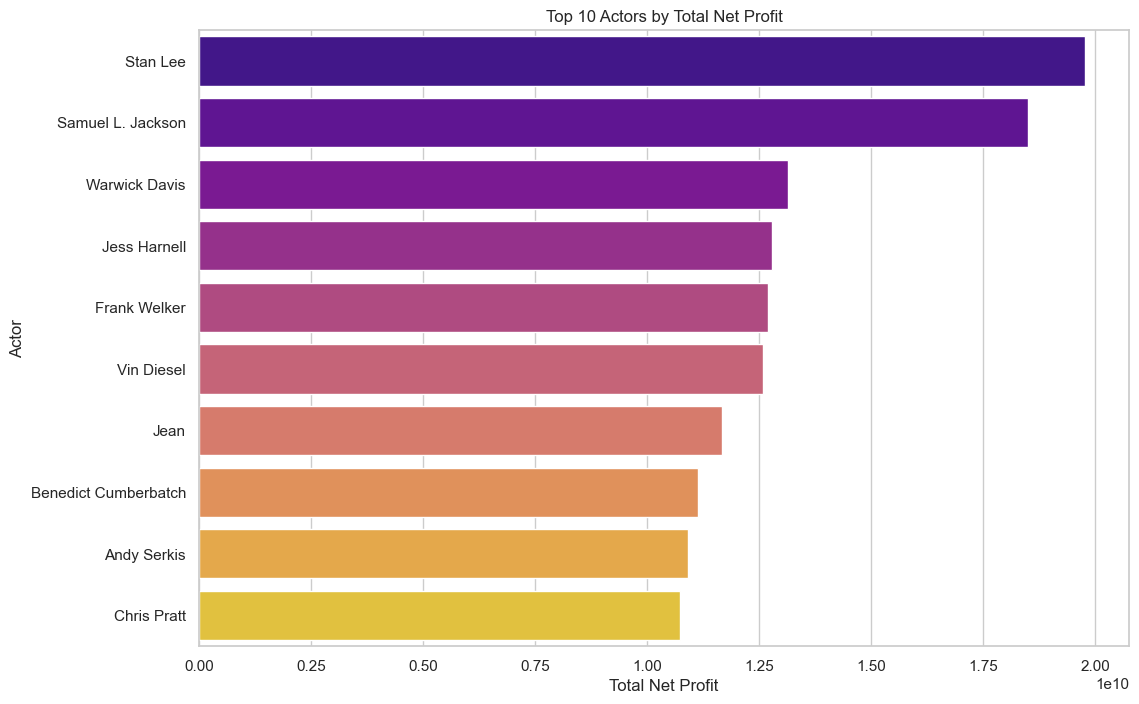

In [34]:
# Execute the SQL query to retrieve necessary data
query_actors = """
select m.Title, f.netprofit, m.Actors
from Movie m
join Financial f on m.Id = f.Id;
"""

result_actors = pd.read_sql_query(query_actors, conn)

# Display the first few rows of the result
display(result_actors.head(10))

# Step 1: Split the 'actors' column into individual actors
result_actors['actor_list'] = result_actors['Actors'].str.split('-')

# Step 2: Create a new DataFrame to store actor contributions
actor_contributions = []

# Step 3: Distribute the net profit for each movie to the actors in that movie
for _, row in result_actors.iterrows():
    actors = row['actor_list']
    net_profit = row['netprofit']
    for actor in actors:
        actor_contributions.append({'Actors': actor, 'netprofit': net_profit})

# Create a DataFrame from the actor contributions list
actor_df = pd.DataFrame(actor_contributions)

# Step 4: Aggregate net profits by actor
actor_profit = actor_df.groupby('Actors')['netprofit'].sum().reset_index()

# Step 5: Sort by net profit to find top actors
actor_profit = actor_profit.sort_values(by='netprofit', ascending=False)

# Step 6: Visualize the top 10 actors by total net profit
plt.figure(figsize=(12, 8))
sns.barplot(data=actor_profit.head(10), x='netprofit', y='Actors', palette='plasma')
plt.title("Top 10 Actors by Total Net Profit")
plt.xlabel("Total Net Profit")
plt.ylabel("Actor")
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:60%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>5.6. What is the most produced type of movie in the dataset, and how does its production frequency compare to other types?</b></div>

# **Analyzing the Most Produced Genres**

#### To analyze which **genres** are produced the most (i.e., the most common genres in the dataset), you can follow these steps:


,Title,genres
0,Four Rooms,Crime-Comedy
1,Judgment Night,Action-Crime-Thriller
2,Star Wars,Adventure-Action-Science Fiction
3,Finding Nemo,Animation-Family
4,Forrest Gump,Comedy-Drama-Romance
5,American Beauty,Drama
6,Citizen Kane,Mystery-Drama
7,Dancer in the Dark,Drama-Crime
8,The Fifth Element,Adventure-Fantasy-Action-Thriller-Science Fiction
9,My Life Without Me,Drama-Romance


C:\Users\ehabh\AppData\Local\Temp\ipykernel_8092\2823503167.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_frequency.head(10), x='count', y='genre', palette='plasma')


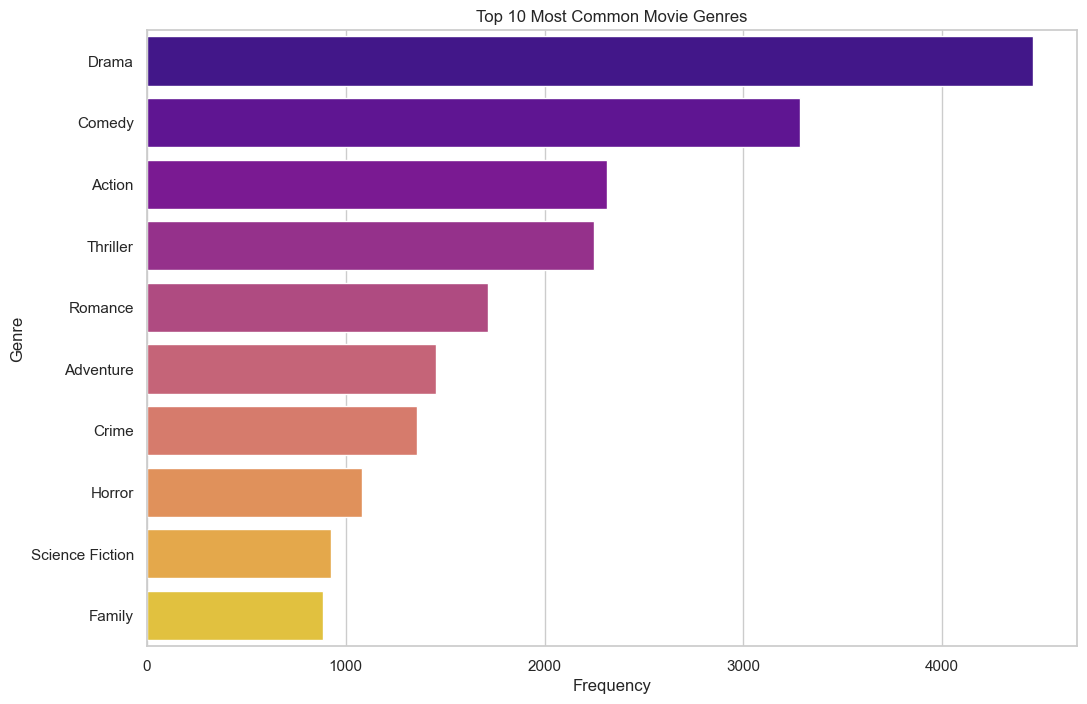

In [37]:
# Execute the SQL query to retrieve genres data
query_genres = """
select m.Title, m.genres
from Movie m;
"""

result_genres = pd.read_sql_query(query_genres, conn)

# Display the first few rows of the result
display(result_genres.head(10))

# Step 1: Split the 'genres' column into individual genres
result_genres['genre_list'] = result_genres['genres'].str.split('-')

# Step 2: Create a new list to store individual genres
all_genres = []

# Step 3: Flatten the list of genres across all movies
for _, row in result_genres.iterrows():
    genres = row['genre_list']
    for genre in genres:
        all_genres.append(genre)

# Step 4: Create a DataFrame with genre counts
genre_count = pd.DataFrame(all_genres, columns=['genre'])

# Step 5: Count the frequency of each genre
genre_frequency = genre_count['genre'].value_counts().reset_index()

# Step 6: Rename columns for clarity
genre_frequency.columns = ['genre', 'count']

# Step 7: Visualize the top genres
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_frequency.head(10), x='count', y='genre', palette='plasma')
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:60%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>5.7. Which genres generate  the most revenue, profit , budget?</b></div>

# **Financial Performance of Movies Across Different Genres**

This analysis explores the financial performance of movies across different genres by calculating the **net profit** (Revenue - Budget) for each genre. 


In [40]:
# SQL query to extract necessary data
query = """
    SELECT m.genres, f.budget, f.Revenue, f.Revenue - f.budget AS netprofit
    FROM Movie m
    JOIN Financial f ON m.Id = f.id
    GROUP BY m.genres, f.budget, f.Revenue
"""

# Load data into a DataFrame
data = pd.read_sql_query(query, conn)

# Display the initial data
display(data)

# Split the 'genres' column into individual rows for detailed analysis
data['genres'] = data['genres'].str.split('-')  # Splitting genres by the delimiter '-'
data = data.explode('genres')  # Creating a new row for each genre
display(data)

# Group and sort data by each metric for visualization
sorted_budget = data.groupby('genres', as_index=False)['budget'].sum().sort_values(by='budget', ascending=False)
sorted_revenue = data.groupby('genres', as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False)
sorted_netprofit = data.groupby('genres', as_index=False)['netprofit'].sum().sort_values(by='netprofit', ascending=False)

# Combine Budget, Revenue, and Net Profit for a comparative visualization
combined_data = data.melt(id_vars='genres', value_vars=['budget', 'revenue', 'netprofit'], 
                          var_name='Metric', value_name='Amount')

# Convert 'Amount' to numeric values, forcing errors to NaN (in case of invalid data)
combined_data['Amount'] = pd.to_numeric(combined_data['Amount'], errors='coerce')

# Group by genres and Metric, summing 'Amount'
combined_data = combined_data.groupby(['genres', 'Metric'], as_index=False)['Amount'].sum()

# Sort the combined data by 'Amount'
combined_data = combined_data.sort_values(by='Amount', ascending=False)

# Display the sorted data
display(combined_data)


,genres,budget,revenue,netprofit
0,Action,0.5,0.5,0.000000e+00
1,Action,100.0,100.0,0.000000e+00
2,Action,1000.0,333333.3333333333,3.323333e+05
3,Action,1000000.0,10499694.0,9.499694e+06
4,Action,1000000.0,4045199.3333333335,3.045199e+06
...,...,...,...,...
9258,Western-Drama-Mystery,5500000.0,15700000.0,1.020000e+07
9259,Western-History,35000000.0,18635620.0,-1.636438e+07
9260,Western-Horror-Thriller,5000000.0,9617000.0,4.617000e+06
9261,Western-Romance,3777.5,25556.0,2.177850e+04


,genres,budget,revenue,netprofit
0,Action,0.5,0.5,0.000000e+00
1,Action,100.0,100.0,0.000000e+00
2,Action,1000.0,333333.3333333333,3.323333e+05
3,Action,1000000.0,10499694.0,9.499694e+06
4,Action,1000000.0,4045199.3333333335,3.045199e+06
...,...,...,...,...
9261,Western,3777.5,25556.0,2.177850e+04
9261,Romance,3777.5,25556.0,2.177850e+04
9262,Western,3000000.0,10200000.0,7.200000e+06
9262,Romance,3000000.0,10200000.0,7.200000e+06


,genres,Metric,Amount
2,Action,revenue,2.232816e+11
5,Adventure,revenue,2.212506e+11
11,Comedy,revenue,1.743710e+11
4,Adventure,netprofit,1.537230e+11
1,Action,netprofit,1.463984e+11
20,Drama,revenue,1.352783e+11
10,Comedy,netprofit,1.149865e+11
44,Science Fiction,revenue,1.102467e+11
50,Thriller,revenue,1.041858e+11
26,Fantasy,revenue,1.035082e+11


<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:60%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>5.8. How do the number of votes and popularity of movies relate to their net profit for movies with more than 50 votes?</b></div>

# **Relationship Between Net Profit, Audience Votes, and Popularity**

This analysis investigates the relationship between the **net profit** of movies and their **audience votes** and **popularity** for movies that have received more than **50 votes**. 

,netprofit,votes,popularity
0,1.860250e+09,7.701,1134.931
1,1.325341e+09,7.239,122.389
2,1.318733e+09,8.303,372.213
3,1.300027e+09,7.281,112.847
4,1.140466e+09,6.6,97.921
...,...,...,...
2599,-7.740000e+07,5.4,16.184
2600,-7.962771e+07,4.5,6.254
2601,-9.963233e+07,2.1,2.026666666666667
2602,-1.110072e+08,6.0,21.42


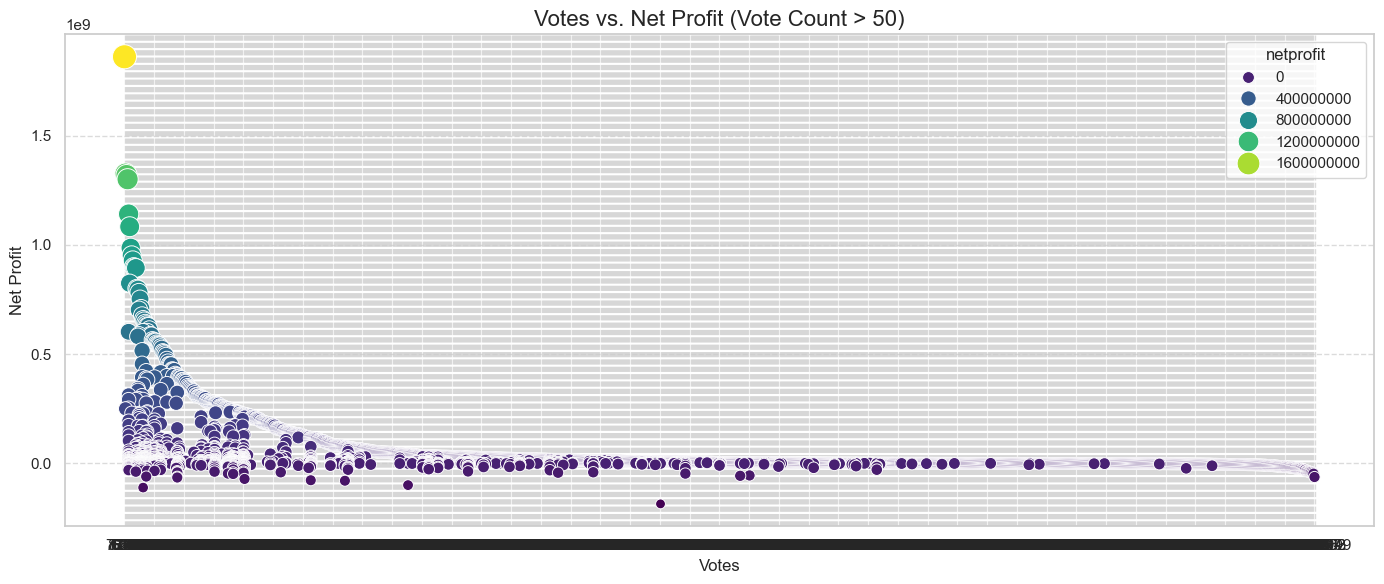

In [43]:
query = """
    SELECT f.netprofit, a.votes, a.popularity
    FROM Financial f
    JOIN Audience a ON f.id = a.id
    WHERE a.vote_count > 50
    ORDER BY f.netprofit DESC;
"""
query_result = pd.read_sql_query(query, conn)

display(query_result)

plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=query_result, x='votes', y='netprofit', hue='netprofit', size='netprofit',
    sizes=(50, 300), palette='viridis'
)

plt.title('Votes vs. Net Profit (Vote Count > 50)', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Net Profit', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:10px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b> 6. Creating Views </b></div>

In [76]:
cursor = conn.cursor()

# Create the SalesView
cursor.execute("""
CREATE VIEW IF NOT EXISTS SalesView1 AS
SELECT 
    id, 
    revenue, 
    budget, 
    netprofit
FROM 
    Financial 
""")

# Create the ArtCriticView
cursor.execute("""
CREATE VIEW IF NOT EXISTS ArtCriticView1 AS
SELECT 
    md.id, 
    md.Title AS Movie_Title, 
    md.genres, 
    md.actors,
    md.runtime, 
    a.popularity, 
    a.votes, 
    a.vote_count
FROM 
    Movie md
INNER JOIN 
    Audience a
ON 
    md.id = a.id
""")

# Commit changes
conn.commit()

# Print confirmation
print("Views created successfully.")

# Test the views (optional: only if you want to see structure/data)
print("\nTesting SalesView structure:")
cursor.execute("PRAGMA table_info(SalesView1)")
print(cursor.fetchall())

print("\nTesting ArtCriticView structure:")
cursor.execute("PRAGMA table_info(ArtCriticView1)")
print(cursor.fetchall())

Views created successfully.

Testing SalesView structure:
[(0, 'id', 'INTEGER', 0, None, 0), (1, 'revenue', 'VARCHAR(19)', 0, None, 0), (2, 'budget', 'VARCHAR(20)', 0, None, 0), (3, 'netprofit', 'REAL', 0, None, 0)]

Testing ArtCriticView structure:
[(0, 'id', 'INTEGER', 0, None, 0), (1, 'Movie_Title', 'VARCHAR(104)', 0, None, 0), (2, 'genres', 'VARCHAR(67)', 0, None, 0), (3, 'Actors', 'VARCHAR(5140)', 0, None, 0), (4, 'runtime', 'VARCHAR(18)', 0, None, 0), (5, 'popularity', 'VARCHAR(18)', 0, None, 0), (6, 'votes', 'VARCHAR(18)', 0, None, 0), (7, 'vote_count', 'VARCHAR(19)', 0, None, 0)]
